In [104]:
import os

def read_text_files(folder_path):
    try:
        text = ""
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".txt"):
                    with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                        text += f.read() + " "
        return text
    except FileNotFoundError:
        print("Directory not found.")
    except PermissionError:
        print("You do not have permission to access one of the directories.")
    except Exception as e:
        print(f"An error occurred: {e}")
        
file_path = os.getcwd() + "/Dataset"
text_data = read_text_files(file_path)

In [105]:
import re
from collections import Counter

words = re.findall(r'[\u1780-\u17FF]+', text_data)
word_count = Counter(words)

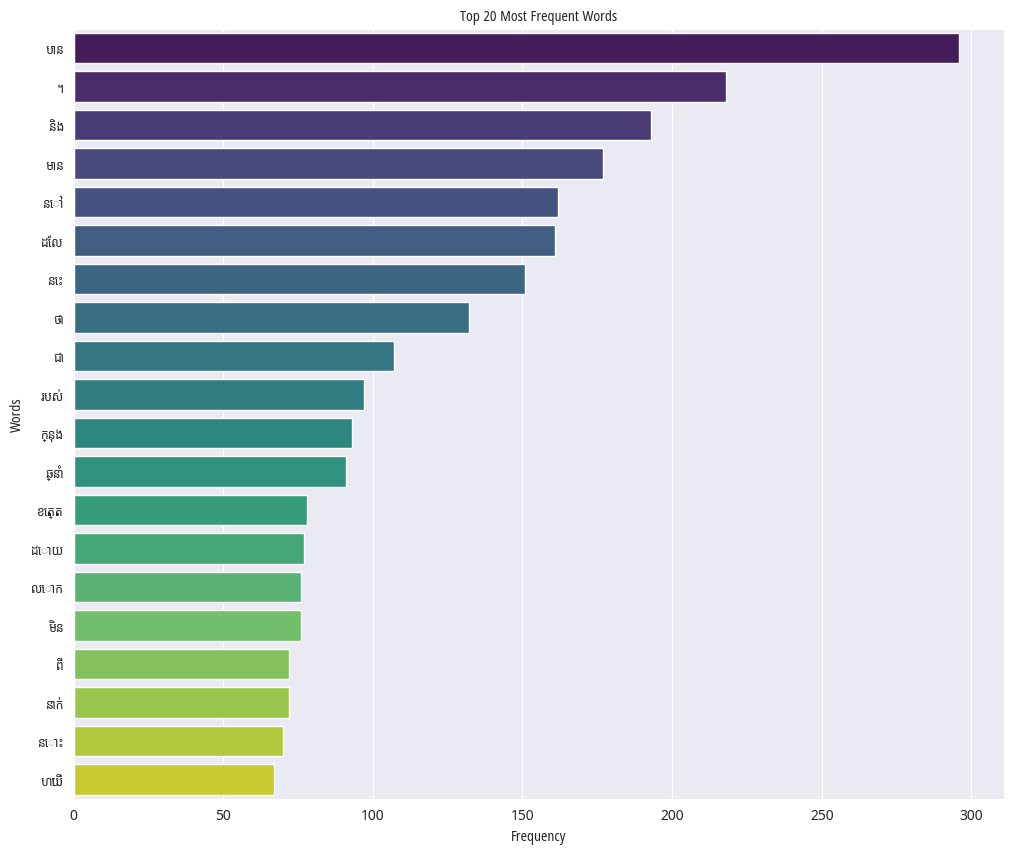

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import font_manager as fm

# Convert the Counter object to a dictionary
word_freq = dict(word_count)

# Define the path to the Khmer font
khmer_font_path = os.path.join(os.getcwd(), "Noto_Sans_Khmer/static/NotoSansKhmer_Condensed-Regular.ttf")
khmer_font = fm.FontProperties(fname=khmer_font_path)

# Plotting the top 20 most common words
top_words = word_count.most_common(20)
words, freqs = zip(*top_words)

# Set the plot size for better visibility
plt.figure(figsize=(12, 10))


# Create a bar plot
sns.barplot(x=list(freqs), y=list(words), hue=list(words), palette="viridis")

# Set labels and title with Khmer-compatible font
plt.xlabel('Frequency', fontproperties=khmer_font)
plt.ylabel('Words', fontproperties=khmer_font)
plt.title('Top 20 Most Frequent Words', fontproperties=khmer_font)

# Set y-tick labels with Khmer-compatible font
plt.yticks(fontproperties=khmer_font)

plt.show()
